In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
x = np.array([2, 0, 2, 2, 7, 4, -2, 5, -1, -1])

def compute_mean(x):
    return np.mean(x)

print(compute_mean(x))

1.8


In [4]:
x = np.array([1, 5, 4, 4, 9, 13])

def compute_median(x):
    x.sort()
    
    if len(x) % 2 == 0:
        return (x[len(x) // 2] + x[len(x) // 2 - 1]) / 2
    else:
        return x[len(x) // 2]

print(compute_median(x))
assert compute_median(x) == np.median(x)

4.5


In [5]:
x = np.array([171, 176, 155, 167, 169, 182])

def compute_std(x):
    mean = compute_mean(x)
    var = 0
    var = np.sum([(i - mean)**2 for i in x]) / len(x)
    return np.sqrt(var)

print(compute_std(x))
assert compute_std(x) == np.std(x)

8.32666399786453


In [6]:
x = np.array([-2, -5, -11, 6, 4, 15, 9])
y = np.array([4, 25, 121, 36, 16, 225, 81])

def compute_corrcoef(x, y):
    n = len(x)
    numerator = n * np.sum(x * y) - np.sum(x) * np.sum(y)
    denominator = np.sqrt((n * np.sum(x**2) - np.sum(x)**2) * (n * np.sum(y**2) - np.sum(y)**2))
    return numerator / denominator

print(compute_corrcoef(x, y))

0.42026333096027263


In [7]:
!gdown 1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq

Downloading...
From: https://drive.google.com/uc?id=1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq
To: e:\projects\aio\module-2\week-4\advertising.csv

  0%|          | 0.00/4.06k [00:00<?, ?B/s]
100%|██████████| 4.06k/4.06k [00:00<?, ?B/s]


In [8]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
x = df['TV']
y = df['Radio']

In [12]:
corr_xy = compute_corrcoef(x, y)
print(corr_xy)

0.05480866446582933


In [13]:
features = ['TV', 'Radio', 'Newspaper']

for feat1 in features:
    for feat2 in features:
        corr = compute_corrcoef(df[feat1], df[feat2])
        print(f'{feat1} and {feat2}: {corr}')

TV and TV: 1.0
TV and Radio: 0.05480866446582933
TV and Newspaper: 0.05664787496505687
Radio and TV: 0.05480866446582933
Radio and Radio: 1.0
Radio and Newspaper: 0.35410375076117506
Newspaper and TV: 0.05664787496505687
Newspaper and Radio: 0.35410375076117506
Newspaper and Newspaper: 1.0


In [20]:
x = df['Radio']
y = df['Newspaper']

res = np.corrcoef(x, y)

print(res)

[[1.         0.35410375]
 [0.35410375 1.        ]]


In [21]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


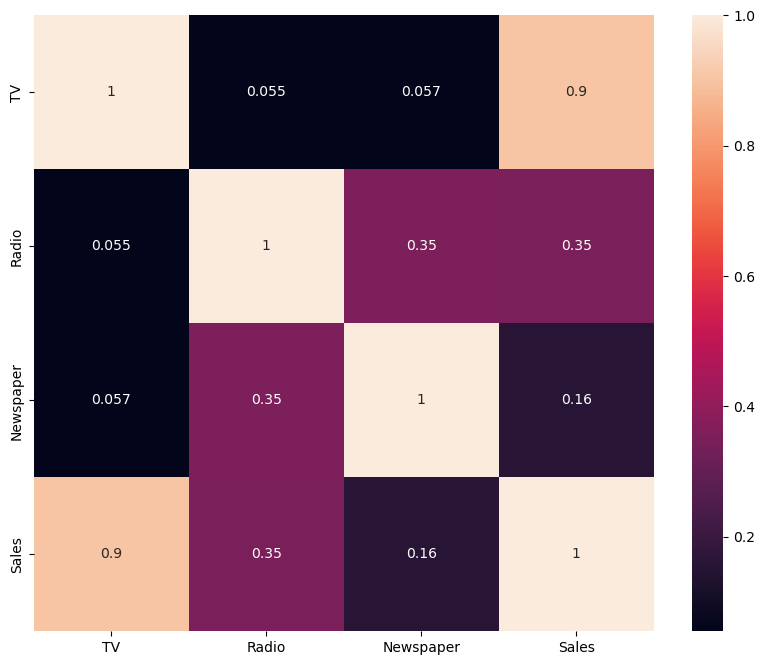

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()